# Spatial Distribution Analysis

We will address the problem of comparing 1D spatial distributions of data. This is done by calculating the density of each data point by finding its nearest neighbour (using a KD tree), and later calculating the Kolmogorov-Smirnov (K-S)  test over the density distributions.

We start by sampling from two (Gaussian) distributions.

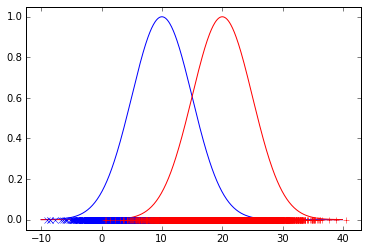

In [16]:
%matplotlib inline

import numpy as np
import pylab as pl

N = 10000
mu1, s1 = 10, 5

mu2, s2 = 20, 5

x1 = np.random.normal(loc = mu1, scale = s1, size = N)
x2 = np.random.normal(loc = mu2, scale = s2, size = N)

x_ = np.arange (-10, 40, 0.1)
pl.clf()
pl.plot(x_, np.exp(-(x_ - mu1)**2/(2*s1**2)), "b")
pl.plot(x_, np.exp(-(x_ - mu2)**2/(2*s2**2)), "r")
pl.plot(x1, np.zeros(len(x1)), "bx")
pl.plot(x2, np.zeros(len(x2)), "r+")
pl.margins(0.05)
pl.show()

We use a KD tree to find the distance to the closest point for each point. 

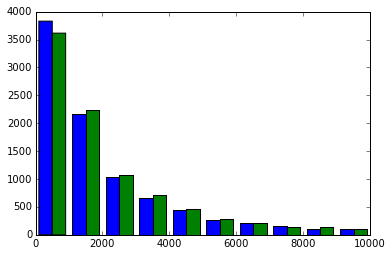

In [17]:
from sklearn.neighbors import KDTree

def getDensities (x):
    kdt = KDTree(x, leaf_size=30, metric='euclidean')
    y = kdt.query(x, k=2, return_distance=True) 
    return 1./ y[0][:, 1]

x1 = x1.reshape ((N, 1))
x2 = x2.reshape ((N, 1))
d1 = getDensities (x1)
d2 = getDensities (x2)


# We plot the histograms to have some intuition of the distance distributions.
pl.clf()
pl.hist ([d1, d2], range = [0, 10000])
pl.show()

Now we calculate the Kolmogorov-Smirnov (KS) statistics on the two samples. No need to use a non-parametric density function, as K-S is already non-parametric.

In [18]:
import scipy

ks = scipy.stats.ks_2samp (d1, d2)
print ks

Ks_2sampResult(statistic=0.026499999999999968, pvalue=0.001740613367088374)


The statistic is the maximum difference between the cumulative distributions of the samples, while the pvalue is the probability of the null hypothesis (both distributions are the same).

Now let's calculate the p-values in terms of the differences of standard deviations of the Gaussian distributions.

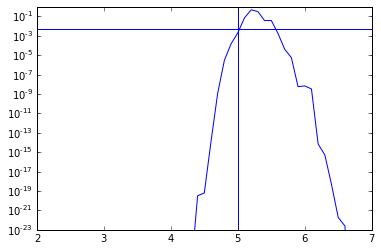

In [20]:
p_values = []
ss = np.arange(2, 7, 0.1) # array of different sigmas for the second distribution.
for s2 in ss:
    x2 = np.random.normal(loc = mu2, scale = s2, size = N)
    d2 = getDensities (x2.reshape ((N, 1)))
    ks = scipy.stats.ks_2samp (d1, d2)
    p_values.append (ks[1])
    
pl.clf()
pl.plot(ss, p_values)
pl.axvline(s1)
pl.axhline (0.005)
pl.yscale ("log")
pl.ylim([1e-23, 1])
pl.show()

So the closer the distribution of densities are, the larger the K-S p-values. The threshold used to accept the null hypothesis is usually chosen as 0.5%.